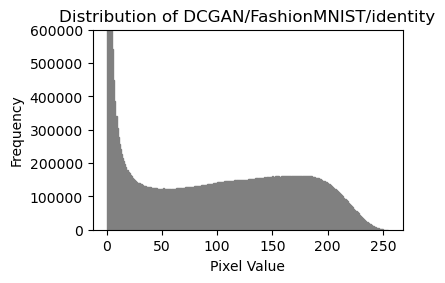

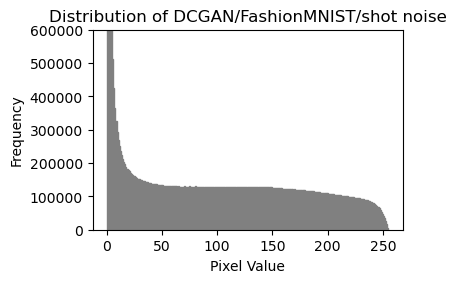

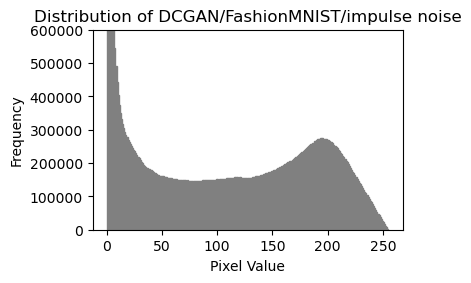

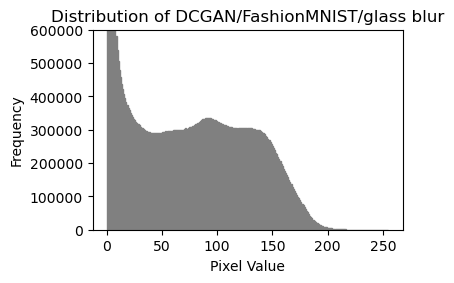

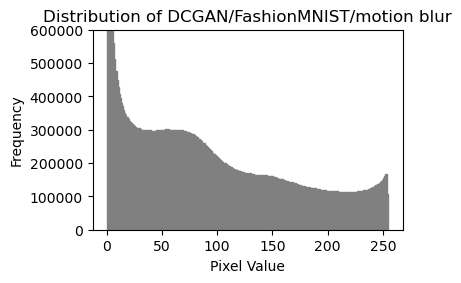

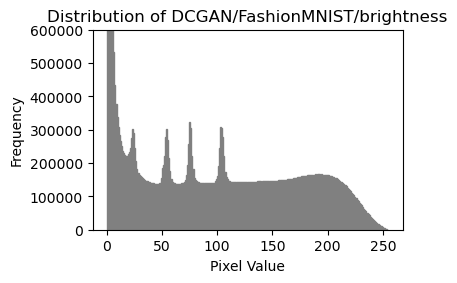

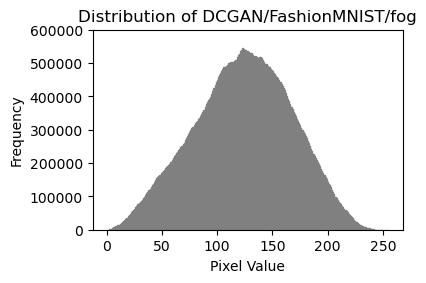

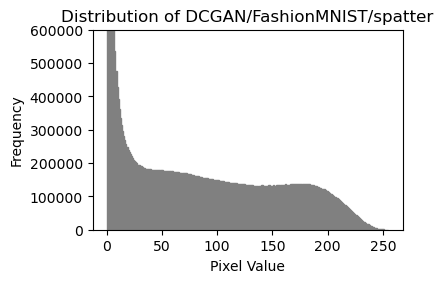

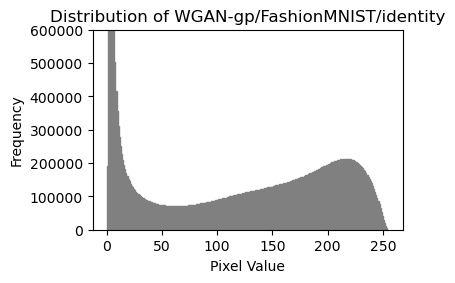

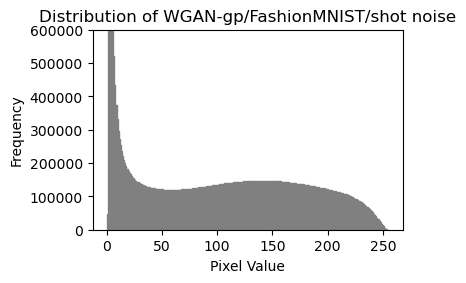

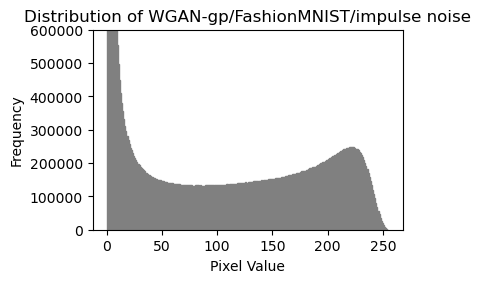

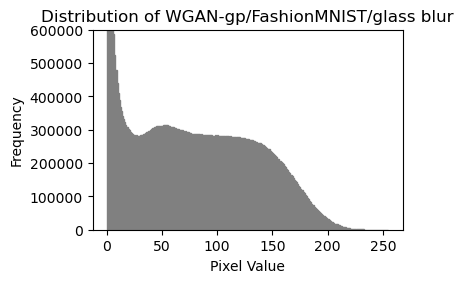

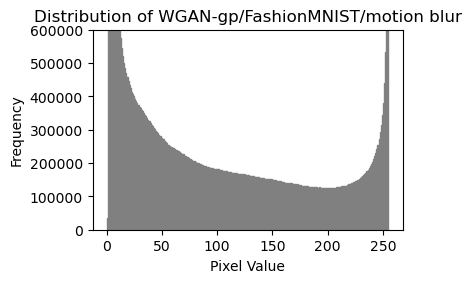

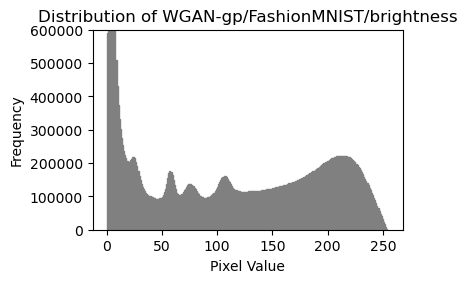

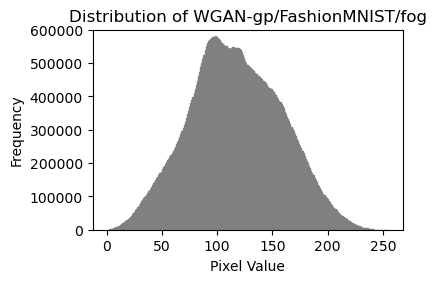

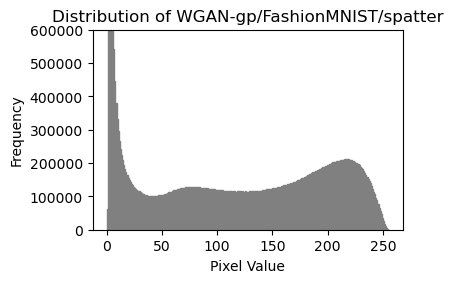

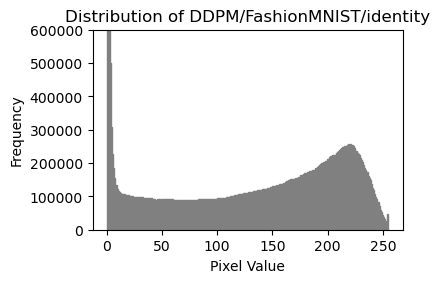

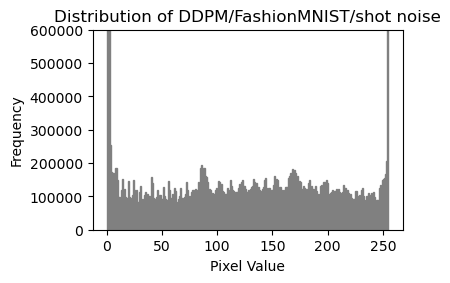

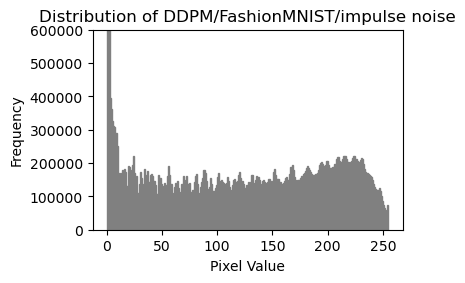

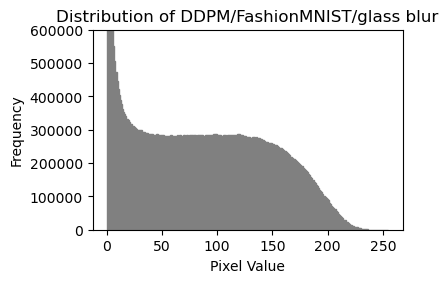

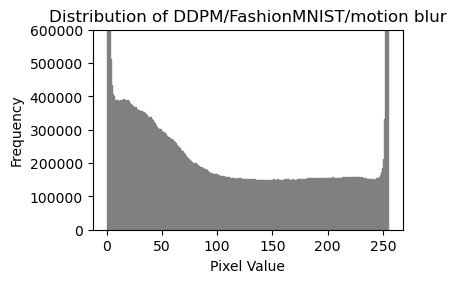

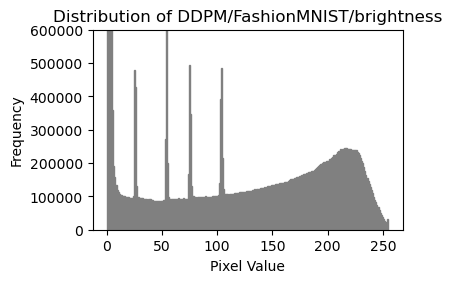

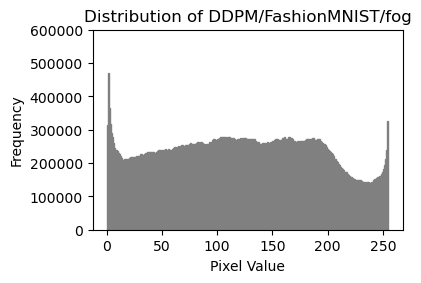

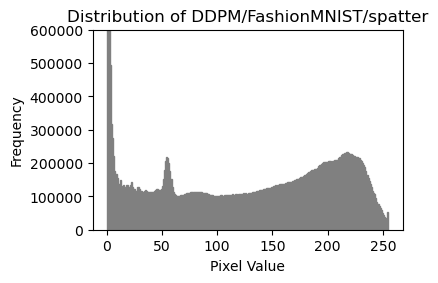

In [8]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

models = ["dcgan","wgan","ddpm"]
datasets = ["fashion_mnist"]
corruptions = ["identity","shot_noise","impulse_noise","glass_blur",
               "motion_blur","brightness","fog","spatter"]
# colors = ["red","blue","green"]

for model in models:
    if model == "dcgan":
        model_name = "DCGAN"
    elif model == "wgan":
        model_name = "WGAN-gp"
    elif model == "ddpm":
        model_name = "DDPM"
    for dataset in datasets:
        for corruption in corruptions:
#             for color in colors:
            img_array = np.load("generated_datasets/{}/{}/{}_gen.npy".format(model, dataset, corruption))
            img_array = ((img_array+127.5)*127.5).astype(np.uint8)
#                 if color == "red":
#                     i = 0
#                 elif color == "green":
#                     i=1
#                 elif color == "blue":
#                     i=2
#                 img = img_array[:,:,:,i]
            dataset_name = dataset.replace('_', ' ')
            if dataset == "mnist":
                dataset_name = "MNIST"
            elif dataset == "fashion_mnist":
                dataset_name = "FashionMNIST"
            elif dataset == "cifar10":
                dataset_name = "CIFAR-10"
            elif dataset == "cifar100":
                dataset_name = "CIFAR-100"
            corruption_name = corruption.replace('_', ' ')
            # 히스토그램 그리기
            fig = plt.figure(figsize=(4, 2.6))
            plt.hist(img_array.ravel(), bins=256, range=(0, 255), fc="gray", ec="gray")
            plt.title("Distribution of {}/{}/{}".format(model_name, dataset_name, corruption_name))
            plt.xlabel('Pixel Value')
            plt.ylabel('Frequency')
            plt.ylim(0, 0.6*1e6)
            plt.show()

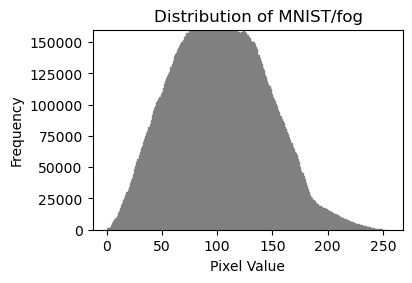

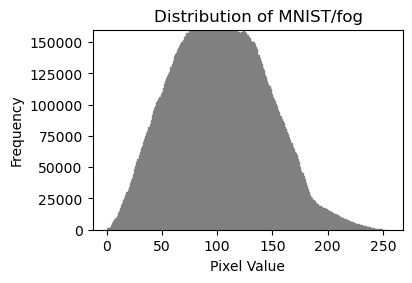

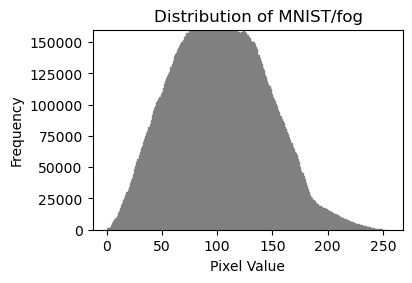

--


In [16]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

datasets = ["mnist"]
corruptions = ["fog"]

for dataset in datasets:
    for corruption in corruptions:
        original_datasets = np.load("original_datasets/{}/{}.npy".format(dataset
                                                                             , corruption))
        
        original_datasets = original_datasets[np.random.choice(len(original_datasets)
                                                               , size=5000, replace=False)]
        
        resized_image_array = np.zeros((5000, 64, 64, 3))
        for i in range(5000):
            image = Image.fromarray(original_datasets[i])
            resized_image = image.resize((64, 64))
            resized_image_array[i] = np.array(resized_image)
        original_datasets = resized_image_array
        original_datasets = original_datasets.astype(np.uint8)
        
        if dataset == "mnist":
            dataset_name = "MNIST"
        elif dataset == "fashion_mnist":
            dataset_name = "FashionMNIST"
        elif dataset == "cifar10":
            dataset_name = "CIFAR-10"
        elif dataset == "cifar100":
            dataset_name = "CIFAR-100"
        corruption_name = corruption.replace('_', ' ')
        # 히스토그램 그리기
        colors = ["red","blue","green"]
        for color in colors:
            if color == "red":
                i = 0
            elif color == "green":
                i=1
            elif color == "blue":
                i=2
            img = original_datasets[:,:,:,i]
            # 히스토그램 그리기
            fig = plt.figure(figsize=(4, 2.6))
            plt.ylim(0,160000)
            plt.hist(img.ravel(), bins=256, range=(0, 255), fc="{}".format("gray"), ec="{}".format("gray"))
            plt.title("    Distribution of {}/{}".format(dataset_name,corruption_name))
            plt.xlabel('Pixel Value')
            plt.ylabel('Frequency')
            plt.show()
    print("--")

dcgan-mnist


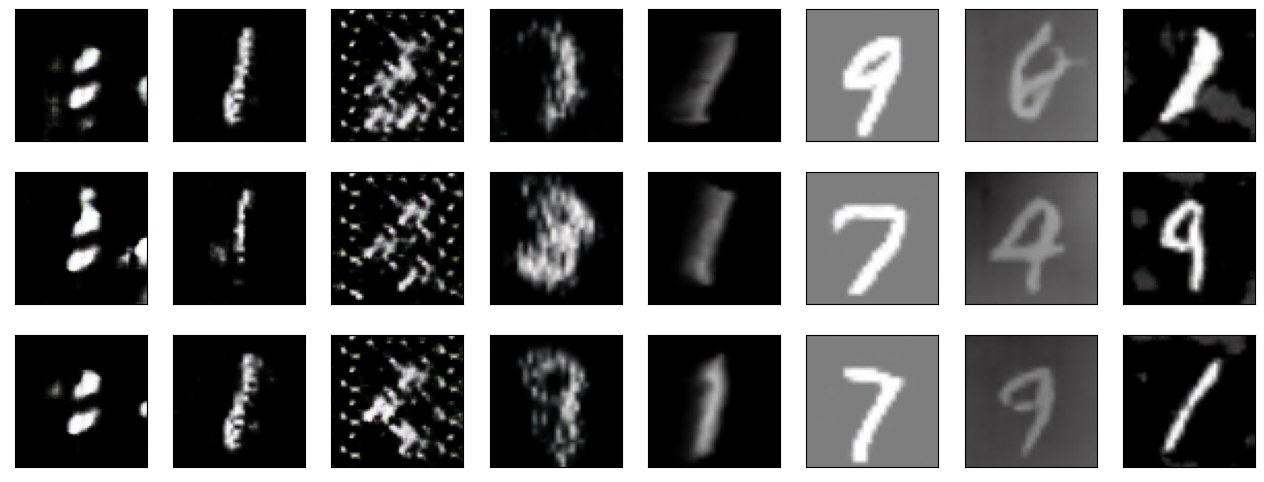


dcgan-fashion_mnist


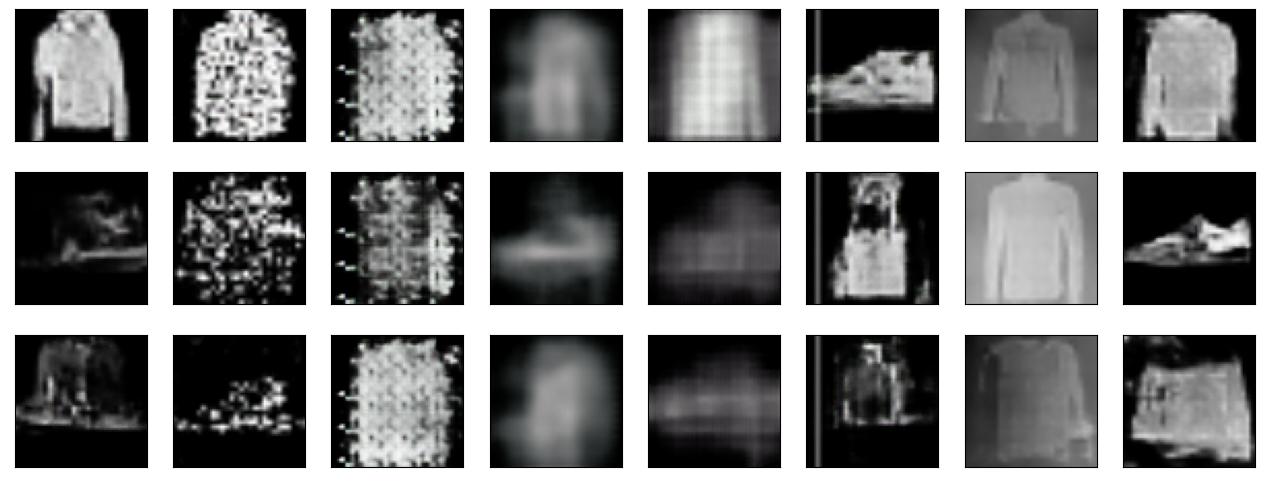


dcgan-cifar10


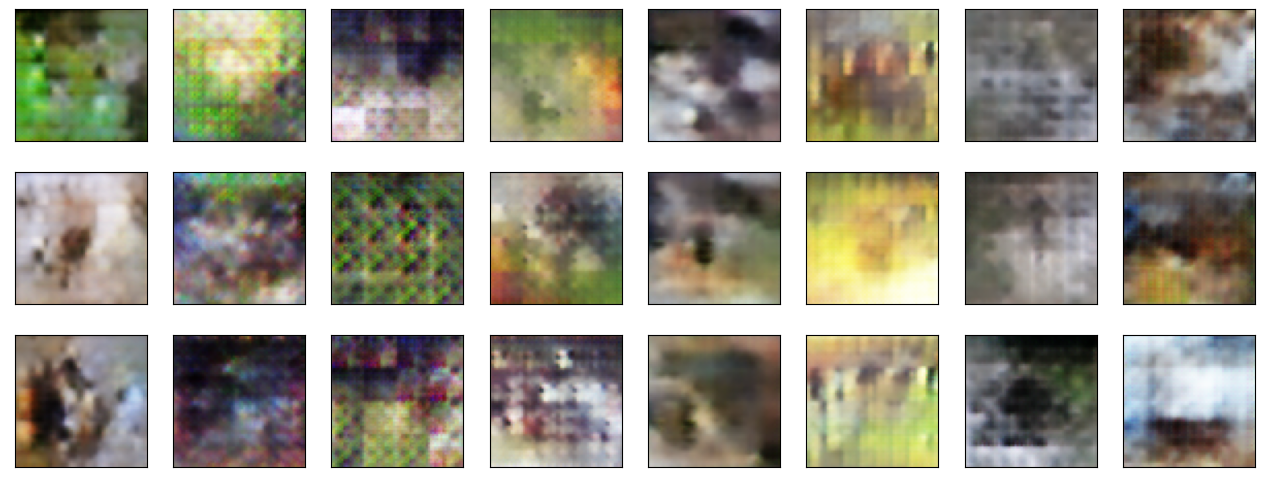


dcgan-cifar100


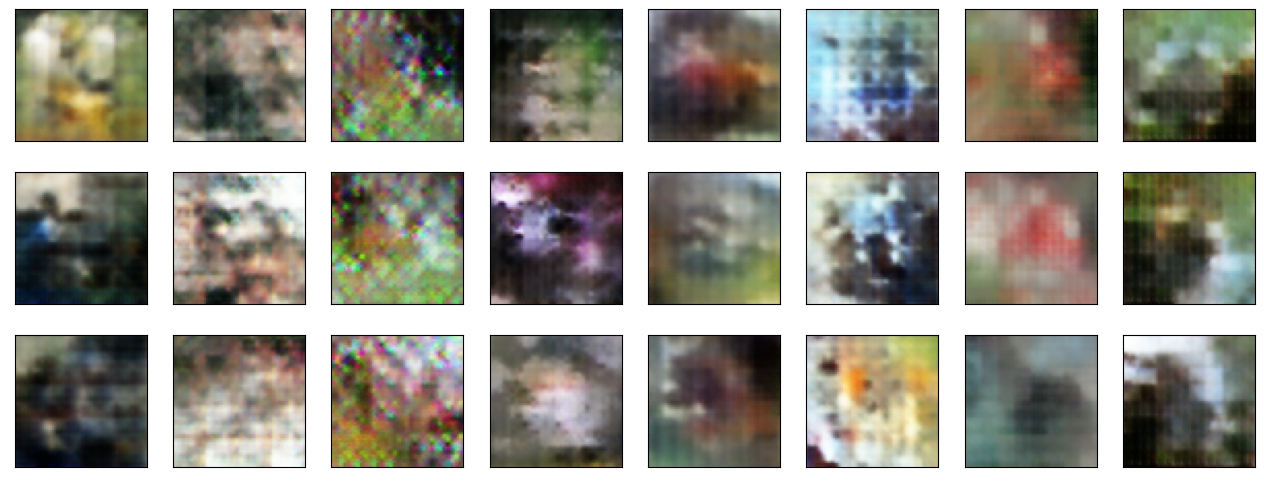


wgan-mnist


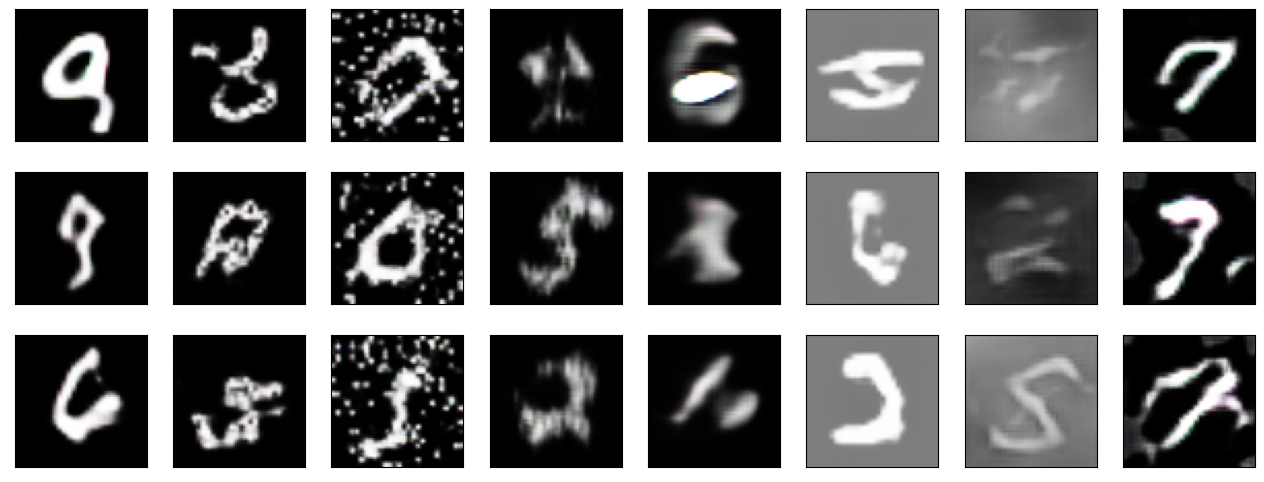


wgan-fashion_mnist


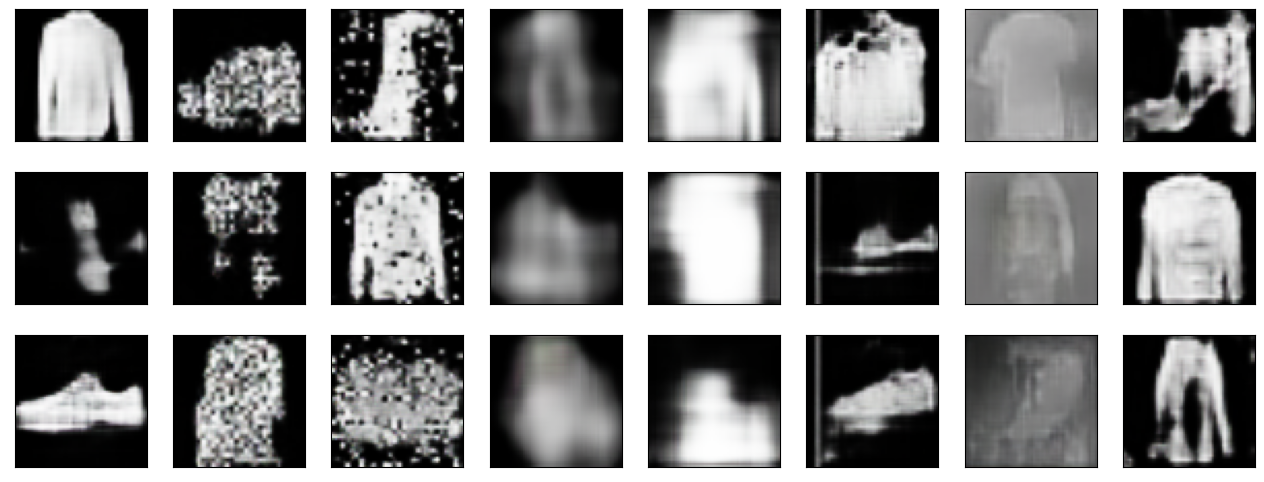


wgan-cifar10


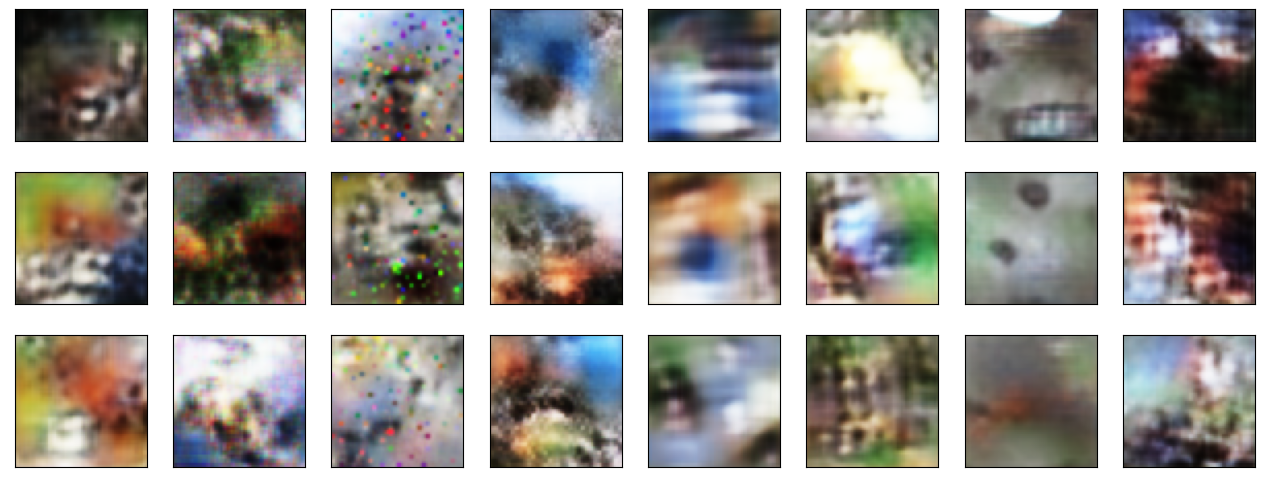


wgan-cifar100


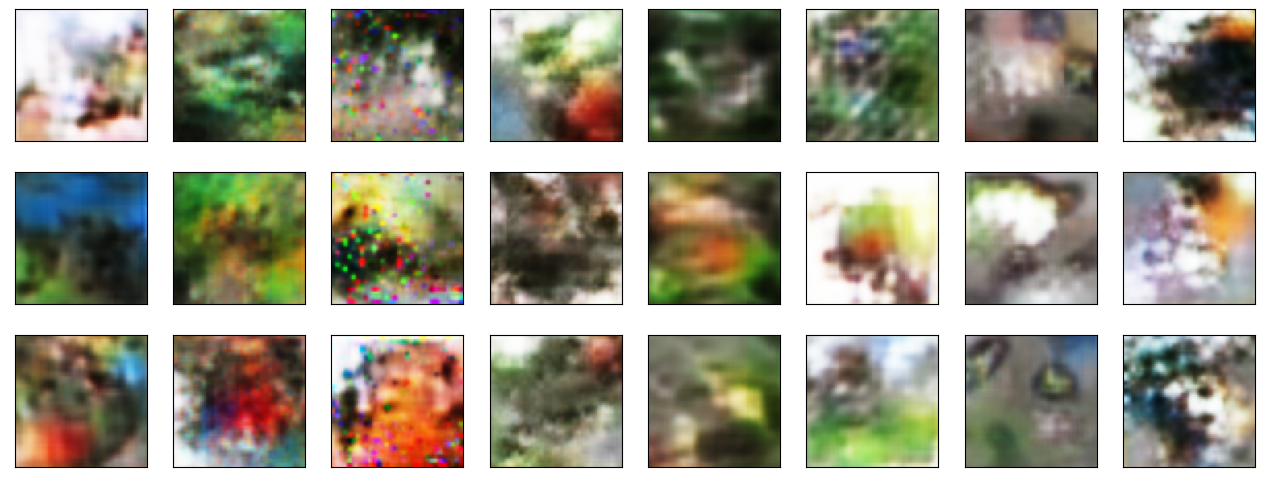


ddpm-mnist


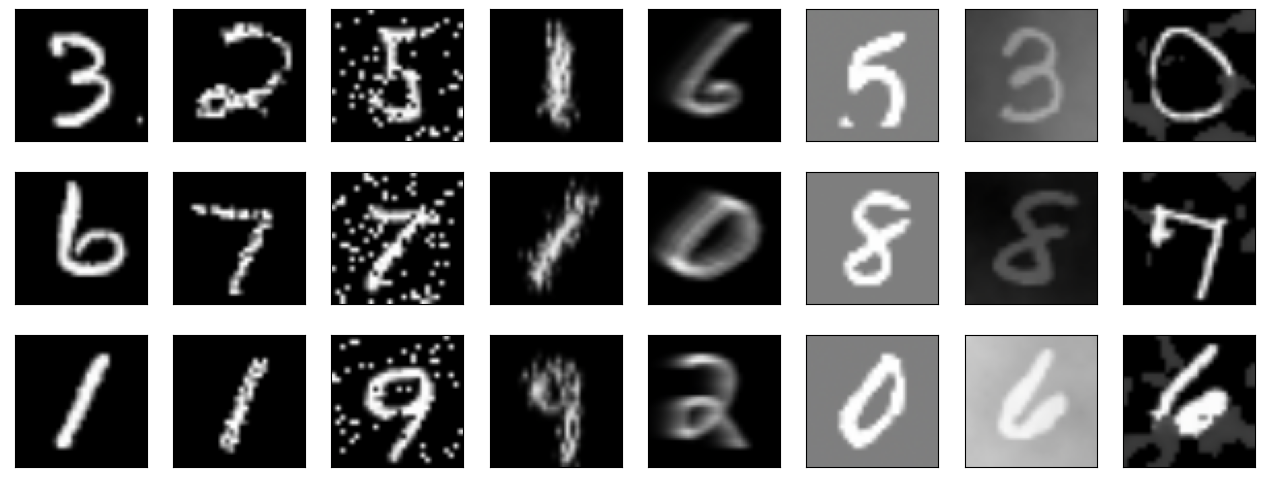


ddpm-fashion_mnist


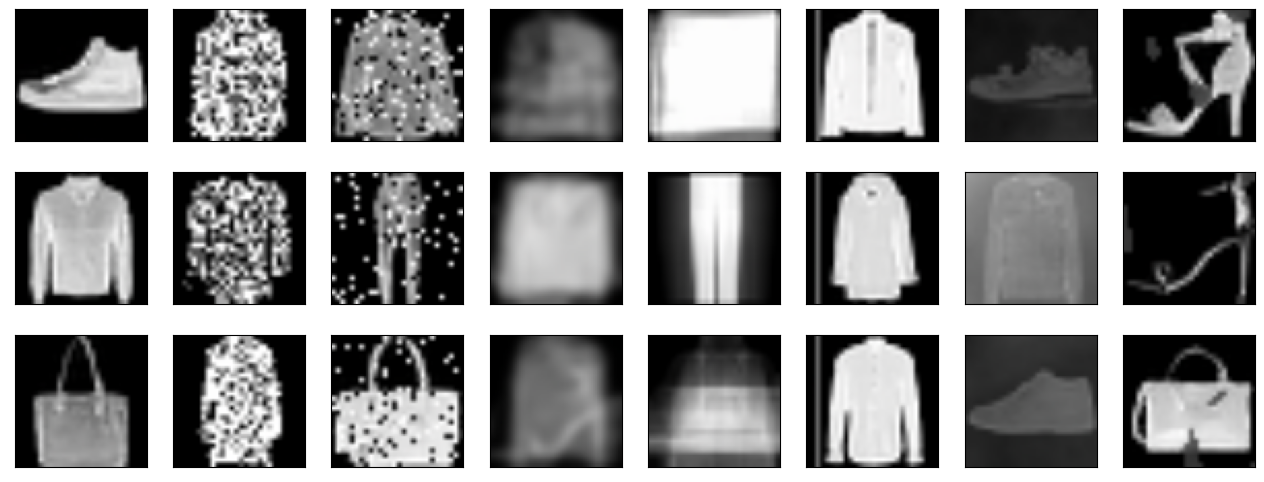


ddpm-cifar10


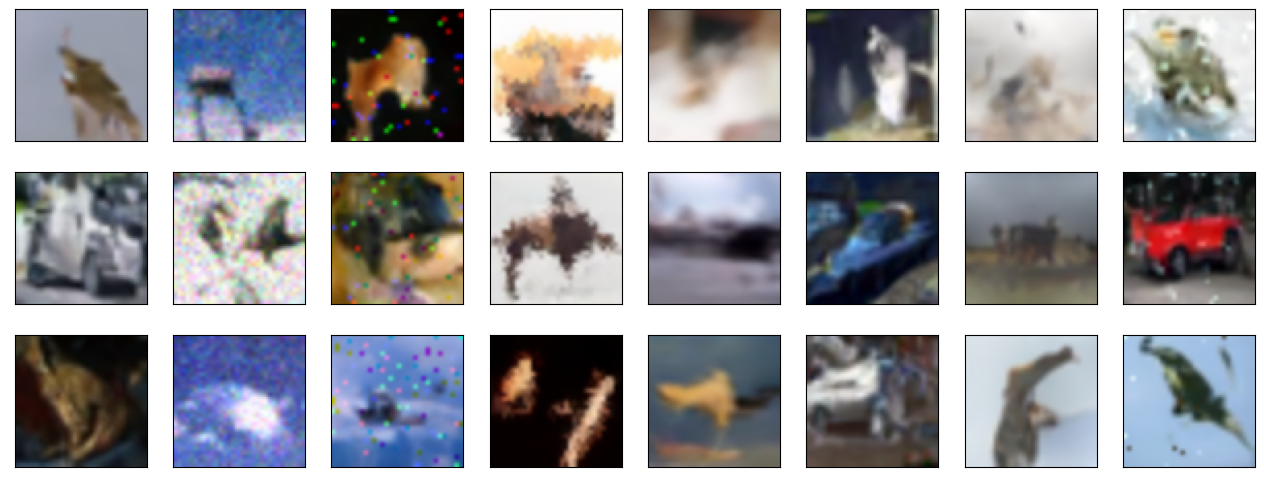


ddpm-cifar100


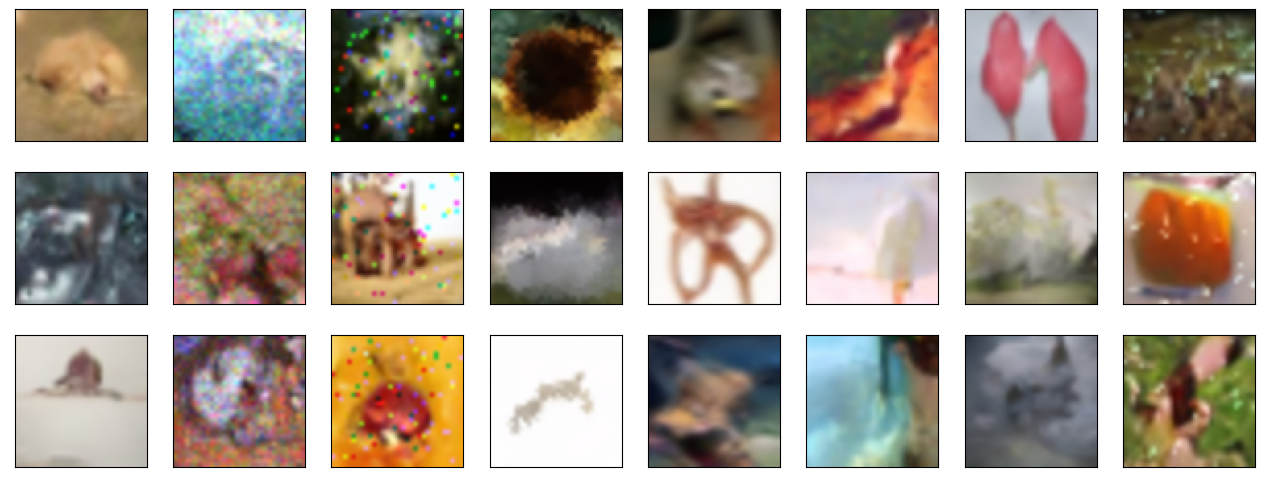

In [11]:
import numpy as np
import matplotlib.pyplot as plt

models = ["dcgan","wgan","ddpm"]
datasets = ["mnist","fashion_mnist","cifar10","cifar100"]
corruptions = ["identity","shot_noise","impulse_noise","glass_blur",
               "motion_blur","brightness","fog","spatter"]

for model in models:
    for dataset in datasets:
        print("{}-{}".format(model, dataset))
        arr1 = []
        arr2 = []
        arr3 = []
        for corruption in corruptions:
            img_dir = "generated_datasets/{}/{}/{}_gen.npy".format(model, dataset, corruption)
            generated_datasets = np.load(img_dir)
            generated_datasets = ((generated_datasets+1)*127.5).astype(np.uint8)
                        
            sample = np.random.choice(5000, size=2, replace=False)
#             print(sample)
            arr1.append(generated_datasets[1000])
            arr2.append(generated_datasets[sample[0]])
            arr3.append(generated_datasets[sample[1]])

            
        # figure 생성
        fig, axes = plt.subplots(nrows=3, ncols=8, figsize=(16, 6))

        # 각 배열을 subplot에 출력
        for i in range(8):
            axes[0][i].imshow(arr1[i])
            axes[0][i].set_xticks([])
            axes[0][i].set_yticks([])

            axes[1][i].imshow(arr2[i])
            axes[1][i].set_xticks([])
            axes[1][i].set_yticks([])

            axes[2][i].imshow(arr3[i])
            axes[2][i].set_xticks([])
            axes[2][i].set_yticks([])

        plt.show()
        print()